<a href="https://colab.research.google.com/github/FerMarcs/SSF-Oto24FernandaPamelaMarcosGonzalez/blob/main/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ejercicio 2.A
import numpy as np

# Definir la función f(x)
def f(x):
    return np.sin(x)

# Derivada numérica centrada
def derivative_central(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Calcular la derivada en un punto, por ejemplo x = pi/4
x = np.pi / 4
df_dx = derivative_central(f, x)
print(f"La derivada numérica en x = {x} es {df_dx}")

La derivada numérica en x = 0.7853981633974483 es 0.7071067811725839


In [2]:
#Ejercicio A.3
# Derivada segunda usando diferencias finitas centradas
def second_derivative_central(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

# Calcular la derivada segunda en x = pi/4
second_df_dx2 = second_derivative_central(f, x)
print(f"La segunda derivada numérica en x = {x} es {second_df_dx2}")

La segunda derivada numérica en x = 0.7853981633974483 es -0.7071054852758606


In [3]:
#Ejercicio A.4 usando Gauss-Legendre:
import numpy.polynomial.legendre as lg

# Definir la función f(x) a integrar
def integrand(x):
    return np.sin(x)

# Definir los límites de integración
a, b = 0, np.pi

# Aplicar la regla de Gauss-Legendre con 6 puntos
n = 6
[x_legendre, w_legendre] = lg.leggauss(n)
# Cambio de intervalo a [a,b]
x_legendre = 0.5 * (x_legendre + 1) * (b - a) + a
w_legendre = 0.5 * w_legendre * (b - a)

# Integrar
integral = np.sum(w_legendre * integrand(x_legendre))
print(f"La integral numérica usando Gauss-Legendre es: {integral}")


La integral numérica usando Gauss-Legendre es: 1.9999999994772721


In [6]:
#Ejercicio A.6 con Gauss-Legendre:
# Definir la función f(x) a integrar en el Ejercicio A.6
def integrand_A6(x):
    return np.exp(-x**2)

# Aplicar la regla de Gauss-Legendre con 15 puntos
n = 15
[x_legendre, w_legendre] = lg.leggauss(n)
# Cambio de intervalo a [a,b]
a, b = 0, 1
x_legendre = 0.5 * (x_legendre + 1) * (b - a) + a
w_legendre = 0.5 * w_legendre * (b - a)

# Integrar
integral_A6 = np.sum(w_legendre * integrand_A6(x_legendre))
print(f"La integral numérica usando Gauss-Legendre para A.6 es: {integral_A6}")


La integral numérica usando Gauss-Legendre para A.6 es: 0.7468241328124268


In [4]:
from scipy.integrate import fixed_quad

# Definir los límites de integración
a, b = 0, np.pi

# Resolver usando Gauss-Legendre con scipy
integral_scipy, _ = fixed_quad(integrand, a, b, n=6)
print(f"La integral numérica usando scipy es: {integral_scipy}")


La integral numérica usando scipy es: 1.9999999994772708


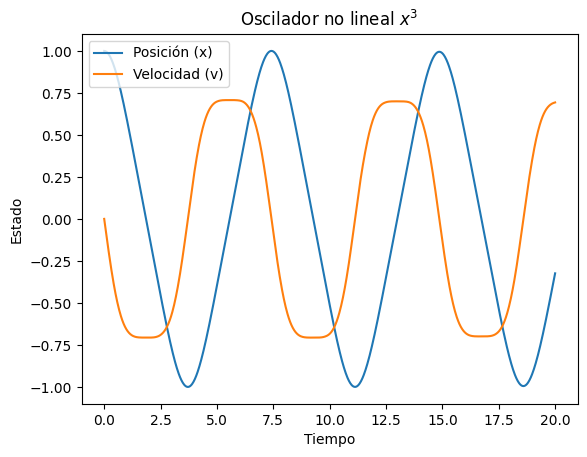

In [7]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial del oscilador no lineal
def nonlinear_oscillator(t, y):
    x, v = y
    dxdt = v
    dvdt = -x**3  # No linealidad x^3
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [1, 0]  # Posición inicial = 1, velocidad inicial = 0

# Tiempo de simulación
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la ecuación diferencial
sol = solve_ivp(nonlinear_oscillator, t_span, y0, t_eval=t_eval)

# Graficar resultados
plt.plot(sol.t, sol.y[0], label='Posición (x)')
plt.plot(sol.t, sol.y[1], label='Velocidad (v)')
plt.xlabel('Tiempo')
plt.ylabel('Estado')
plt.title('Oscilador no lineal $x^3$')
plt.legend()
plt.show()
